In [1]:
import nilmtk
from nilmtk.timeframe import TimeFrame

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
TRAINING_DATA_DURATION = 12
delta_time = pd.to_timedelta(TRAINING_DATA_DURATION, unit='h')

# Building 1

In [4]:
redd = nilmtk.DataSet("redd.h5")

In [5]:
building_1 = redd.buildings[1].elec

In [6]:
building_1.mains()

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
)

In [7]:
building_1.available_ac_types('power')

['apparent', 'active']

In [8]:
building_1.submeters().available_ac_types('power')

['active']

In [9]:
building_1.submeters()

MeterGroup(meters=
  ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])
  ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=12, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=13, building=1, dataset='REDD', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=14, building=1, dataset='REDD', appliances=[Appliance(type='electric stove', instance=1)])
  ElecMeter(insta

In [10]:
# building_1.plot_when_on(on_power_threshold = 40)

### Main Meter

In [11]:
building_1.mains()

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
)

In [12]:
main_meter = building_1.mains()[1]

In [13]:
start_time = main_meter.get_timeframe().start
end_time = start_time + delta_time

In [14]:
print("Start Time:", start_time)
print("End Time:",   end_time)

Start Time: 2011-04-18 09:22:09-04:00
End Time: 2011-04-18 21:22:09-04:00


In [15]:
kw = {'sections': [TimeFrame(start=start_time, end=end_time)], 'sample_period': 3, 'resample': True}

{'sections': [TimeFrame(start='2011-04-18 09:22:09-04:00', end='2011-04-18 21:22:09-04:00', empty=False)], 'sample_period': 3, 'resample': True}
2011-04-18 09:22:09-04:00    225.283325
2011-04-18 09:22:12-04:00    222.349991
2011-04-18 09:22:15-04:00    222.853333
2011-04-18 09:22:18-04:00    222.706665
2011-04-18 09:22:21-04:00    222.646667
                                ...    
2011-04-18 21:21:54-04:00    139.929993
2011-04-18 21:21:57-04:00    139.446671
2011-04-18 21:22:00-04:00    140.023331
2011-04-18 21:22:03-04:00    140.406662
2011-04-18 21:22:06-04:00    142.940002
Freq: 3s, Name: (power, apparent), Length: 14400, dtype: float32
GOOD


<Axes: >

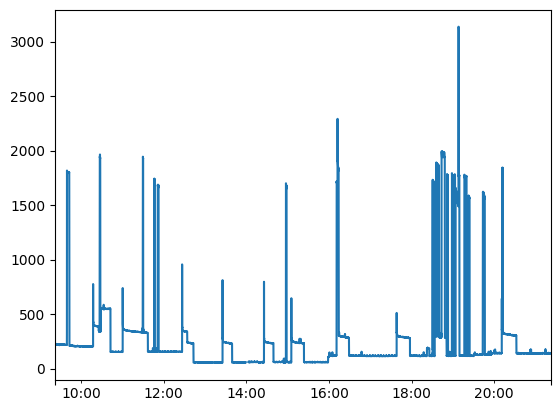

In [16]:
main_df = main_meter.power_series_all_data(**kw)
main_df.plot()

In [17]:
main_df = main_df.to_frame().fillna(0)

### Fridge

{'sections': [TimeFrame(start='2011-04-18 09:22:09-04:00', end='2011-04-18 21:22:09-04:00', empty=False)], 'sample_period': 3, 'resample': True}
2011-04-18 09:22:12-04:00    6.0
2011-04-18 09:22:15-04:00    6.0
2011-04-18 09:22:18-04:00    6.0
2011-04-18 09:22:21-04:00    6.0
2011-04-18 09:22:24-04:00    6.0
                            ... 
2011-04-18 21:21:54-04:00    7.0
2011-04-18 21:21:57-04:00    6.0
2011-04-18 21:22:00-04:00    6.0
2011-04-18 21:22:03-04:00    6.0
2011-04-18 21:22:06-04:00    6.0
Freq: 3s, Name: (power, active), Length: 14399, dtype: float32
GOOD


<Axes: >

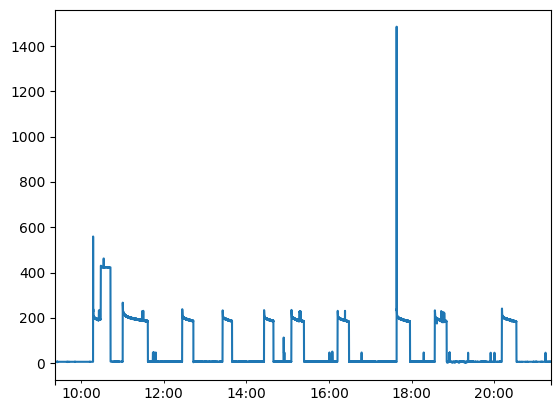

In [18]:
fridge = building_1['fridge']
fridge_df = fridge.power_series_all_data(**kw)
fridge_df.plot()

In [19]:
fridge_df = fridge_df.to_frame().fillna(0)

### Microwave

{'sections': [TimeFrame(start='2011-04-18 09:22:09-04:00', end='2011-04-18 21:22:09-04:00', empty=False)], 'sample_period': 3, 'resample': True}
2011-04-18 09:22:12-04:00    5.0
2011-04-18 09:22:15-04:00    5.0
2011-04-18 09:22:18-04:00    5.0
2011-04-18 09:22:21-04:00    5.0
2011-04-18 09:22:24-04:00    5.0
                            ... 
2011-04-18 21:21:54-04:00    4.0
2011-04-18 21:21:57-04:00    4.0
2011-04-18 21:22:00-04:00    4.0
2011-04-18 21:22:03-04:00    4.0
2011-04-18 21:22:06-04:00    4.0
Freq: 3s, Name: (power, active), Length: 14399, dtype: float32
GOOD


<Axes: >

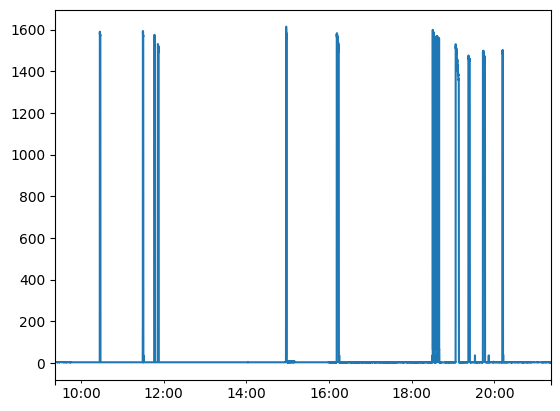

In [20]:
microwave = building_1['microwave']
microwave_df = microwave.power_series_all_data(**kw)
microwave_df.plot()

In [21]:
microwave_df = microwave_df.to_frame().fillna(0)

### Unknown

{'sections': [TimeFrame(start='2011-04-18 09:22:09-04:00', end='2011-04-18 21:22:09-04:00', empty=False)], 'sample_period': 3, 'resample': True}
2011-04-18 09:22:12-04:00    1.0
2011-04-18 09:22:15-04:00    1.0
2011-04-18 09:22:18-04:00    1.0
2011-04-18 09:22:21-04:00    1.0
2011-04-18 09:22:24-04:00    1.0
                            ... 
2011-04-18 21:21:54-04:00    1.0
2011-04-18 21:21:57-04:00    1.0
2011-04-18 21:22:00-04:00    1.0
2011-04-18 21:22:03-04:00    1.0
2011-04-18 21:22:06-04:00    1.0
Freq: 3s, Name: (power, active), Length: 14399, dtype: float32
GOOD


<Axes: >

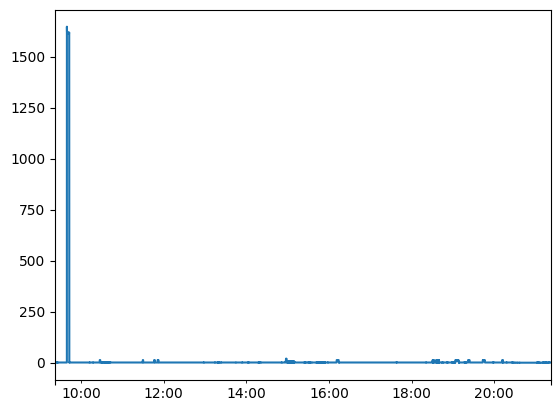

In [22]:
unknown = building_1['unknown']
unknown_df = unknown.power_series_all_data(**kw)
unknown_df.plot()

In [23]:
unknown_df = unknown_df.to_frame().fillna(0)

# Combinatorial Optimization

In [24]:
# CO functions
from nilmtk.disaggregate.combinatorial_optimisation import CO

from nilmtk.feature_detectors import cluster
from nilmtk.disaggregate import Disaggregator
from nilmtk.datastore import HDFDataStore

## Step 1: Cluster

In [25]:
train_appliances = [('fridge', fridge_df),
                    ('unknown', unknown_df)
                   ]

In [26]:
m_co = CO({})
num_on_states = None

if len(train_appliances) > 12:
    max_num_clusters = 2
else:
    max_num_clusters = 3

for appliance, readings in train_appliances:
    states = cluster(readings, max_num_clusters, num_on_states)
    m_co.model.append({
        'states': states,
        'appliance_name': appliance})

In [27]:
m_co.model

[{'states': array([  0, 193, 425], dtype=int32), 'appliance_name': 'fridge'},
 {'states': array([   0,   13, 1618], dtype=int32),
  'appliance_name': 'unknown'}]

## Step 2: Export Model

In [28]:
import pickle

In [29]:
def export_model(model, filename):
    example_dict = model
    with open(filename, "wb") as pickle_out:
        pickle.dump(example_dict, pickle_out)

In [30]:
export_model(m_co, 'm_co.pickle')

## Step 3: Import Model

In [31]:
def import_model(filename):
    with open(filename, "rb") as pickle_in:
        model = pickle.load(pickle_in)
    return model

In [32]:
m_co_load = import_model('m_co.pickle')

## Step 4: Testing

In [33]:
app_df_predicted = m_co.disaggregate_chunk([main_df])[0]

...............CO disaggregate_chunk running.............
Estimating power demand for 'unknown'

In [34]:
fridge_df_predicted = app_df_predicted['fridge']
unknown_df_predicted = app_df_predicted['unknown']

Text(0.5, 0, 'Timestamp')

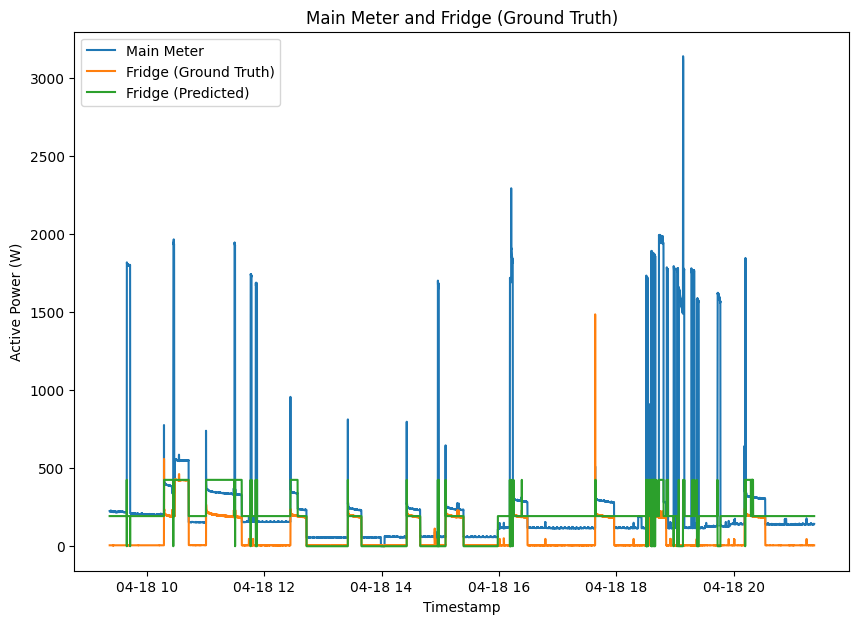

In [35]:
# Plot Fridge
fig = plt.figure(figsize=(10, 7))
plt.plot(main_df, label = 'Main Meter')
plt.plot(fridge_df, label = 'Fridge (Ground Truth)')
plt.plot(fridge_df_predicted, label = 'Fridge (Predicted)')

plt.title("Main Meter and Fridge (Ground Truth)")
plt.legend()
plt.ylabel("Active Power (W)")
plt.xlabel("Timestamp")

Text(0.5, 0, 'Timestamp')

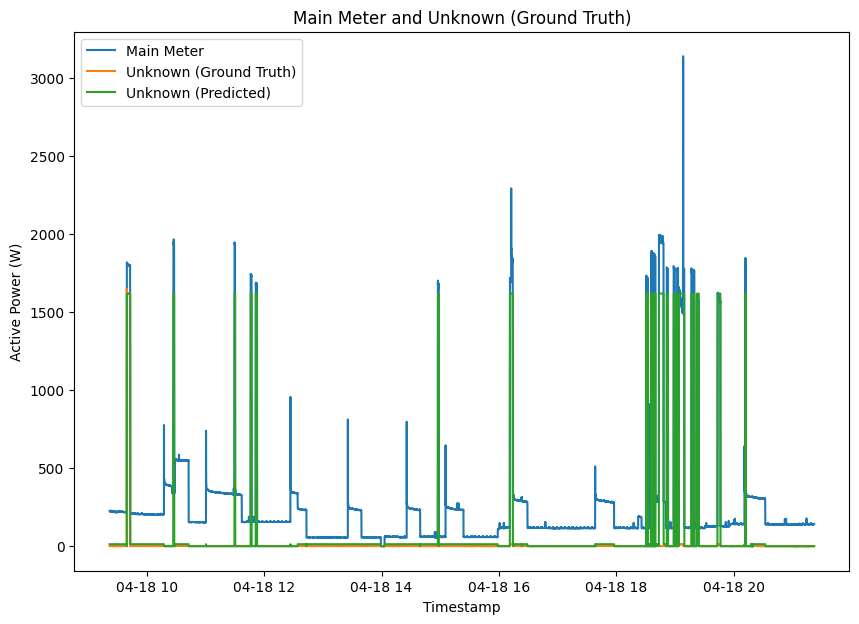

In [36]:
# Plot Unknown
fig = plt.figure(figsize=(10, 7))
plt.plot(main_df, label = 'Main Meter')
plt.plot(unknown_df, label = 'Unknown (Ground Truth)')
plt.plot(unknown_df_predicted, label = 'Unknown (Predicted)')

plt.title("Main Meter and Unknown (Ground Truth)")
plt.legend()
plt.ylabel("Active Power (W)")
plt.xlabel("Timestamp")